In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ACADEMICS/Verzeo ML/PROJECTS/MAJOR PROJECT/Corona_NLP (2).csv', encoding = 'latin1')

In [ ]:
# Description about the dataframe df
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# no.of rows and no.of columns  of the dataframe
df.shape

(41157, 6)

In [ ]:
# Checking of null values
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
df['Sentiment']=df['Sentiment'].replace({'Extremely Positive':'Positive','Extremely Negative':'Negative'})

In [ ]:
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [ ]:
df['OriginalTweet'].sample(3)

36902    DOING GOOD ON GOOD FRIDAY The National Guard i...
7929     With the #Coronavirus &amp; the #CDC guideline...
16452    4th patient of corona virus in Sindh has recov...
Name: OriginalTweet, dtype: object

In [ ]:
df['OriginalTweet'][5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
lm = WordNetLemmatizer()
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
corpus = []
for i in df['OriginalTweet']:
  txt = re.sub('[^A-Za-z0-9]', ' ', i)
  txt = txt.lower()
  txt = word_tokenize(txt)
  txt = [i for i in txt if i not in sw]
  txt = [lm.lemmatize(i) for i in txt]
  txt = " ".join(txt)
  corpus.append(txt)

In [ ]:
print(corpus[:10])

['menyrbie phil gahan chrisitv http co ifz9fan2pa http co xx6ghgfzcc http co i2nlzdxno8', 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order', 'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak http co binca9vp8p', 'food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral http co zrlg0z520j', 'ready go supermarket covid19 outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement http co usmualq72n', 'news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report http co cfxch7

In [ ]:
#cv = CountVectorizer()
#cv_res = cv.fit_transform(corpus).toarray()

In [ ]:
tf = TfidfVectorizer(smooth_idf = False,max_features = 5000)
tf_res = tf.fit_transform(corpus).toarray()

In [ ]:
print(tf_res[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(type(tf_res))

<class 'numpy.ndarray'>


In [ ]:
x = tf_res
y = df['Sentiment']
print(len(x))
print(y.shape)

41157
(41157,)


#       ## Splitting the data into Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30867, 5000)
(10290, 5000)
(30867,)
(10290,)


# ## MULTINOMIAL NAIVE_BAYES CLASSIFICATION

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nbc = MultinomialNB()
nbc.fit(x_train,y_train)

MultinomialNB()

In [ ]:
print('Training Score ',nbc.score(x_train,y_train)*100)
print('Testing Score ',nbc.score(x_test,y_test)*100)

Training Score  72.22924158486408
Testing Score  67.38581146744413


In [ ]:
nbc_ypred = nbc.predict(x_test)
nbc_ypred

array(['Negative', 'Positive', 'Neutral', ..., 'Neutral', 'Positive',
       'Negative'], dtype='<U8')

In [ ]:
cm_nbc = confusion_matrix(y_test,nbc_ypred)
print('Confusion Matrix : \n',cm_nbc)
print('\nClassification Report : \n',classification_report(y_test,nbc_ypred))
nbc_accuracy = accuracy_score(y_test,nbc_ypred)
print('Multinomial Naive Bayes Accuracy : ',nbc_accuracy*100)

Confusion Matrix : 
 [[2753   71 1068]
 [ 506  386 1043]
 [ 603   65 3795]]

Classification Report : 
               precision    recall  f1-score   support

    Negative       0.71      0.71      0.71      3892
     Neutral       0.74      0.20      0.31      1935
    Positive       0.64      0.85      0.73      4463

    accuracy                           0.67     10290
   macro avg       0.70      0.59      0.59     10290
weighted avg       0.69      0.67      0.65     10290

Multinomial Naive Bayes Accuracy :  67.38581146744413


# ##   RANDOM FOREST CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 80, criterion = 'entropy',max_depth = 10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=80)

In [ ]:
print('Training Score : ',rfc.score(x_train,y_train)*100)
print('Testing Score : ',rfc.score(x_test,y_test)*100)

Training Score :  55.72294035701558
Testing Score :  54.761904761904766


In [ ]:
rfc_ypred = rfc.predict(x_test)
rfc_ypred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [ ]:
cm_rfc = confusion_matrix(y_test,rfc_ypred)
print('Confusion Matrix : \n',cm_rfc)
print('\nClassification Report : \n',classification_report(y_test,rfc_ypred, zero_division = 0))
rfc_accuracy = accuracy_score(y_test,rfc_ypred)
print('RandomForest Classification Accuracy : ',rfc_accuracy*100)

Confusion Matrix : 
 [[1316    0 2576]
 [  67    0 1868]
 [ 144    0 4319]]

Classification Report : 
               precision    recall  f1-score   support

    Negative       0.86      0.34      0.49      3892
     Neutral       0.00      0.00      0.00      1935
    Positive       0.49      0.97      0.65      4463

    accuracy                           0.55     10290
   macro avg       0.45      0.44      0.38     10290
weighted avg       0.54      0.55      0.47     10290

RandomForest Classification Accuracy :  54.761904761904766


# ## K-NEAREST NEIGHBORS (KNN) CLASSIFICATION

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 150)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=150)

In [ ]:
# It took a lot of time to execute this cell --> 10-15 minutes
print('Training Score : ',knn.score(x_train,y_train)*100)
print('Testing Score : ',knn.score(x_test,y_test)*100)

Training Score :  63.81572553212168
Testing Score :  63.21671525753159


In [ ]:
# It took a lot of time to execute this cell  --> 5 minutes
knn_ypred = knn.predict(x_test)
knn_ypred

array(['Positive', 'Neutral', 'Neutral', ..., 'Neutral', 'Positive',
       'Negative'], dtype=object)

In [ ]:
cm_knn = confusion_matrix(y_test,knn_ypred)
print('Confusion Matrix : \n',cm_knn)
print('\nClassification Report : \n',classification_report(y_test,knn_ypred))
knn_accuracy = accuracy_score(y_test,knn_ypred)
print('KNN Accuracy : ',knn_accuracy*100)

Confusion Matrix : 
 [[2292  532 1068]
 [ 324  958  653]
 [ 565  643 3255]]

Classification Report : 
               precision    recall  f1-score   support

    Negative       0.72      0.59      0.65      3892
     Neutral       0.45      0.50      0.47      1935
    Positive       0.65      0.73      0.69      4463

    accuracy                           0.63     10290
   macro avg       0.61      0.60      0.60     10290
weighted avg       0.64      0.63      0.63     10290

KNN Accuracy :  63.21671525753159


# ## DECISION TREE CLASSIFICATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# it took 30 sec to execute
dtc = DecisionTreeClassifier(criterion = 'gini',max_depth = 12)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [ ]:
print('Training Score : ',dtc.score(x_train,y_train)*100)
print('Testing Score : ',dtc.score(x_test,y_test)*100)

Training Score :  56.51990799235429
Testing Score :  54.65500485908649


In [ ]:
dtc_ypred = dtc.predict(x_test)
dtc_ypred

array(['Negative', 'Positive', 'Neutral', ..., 'Neutral', 'Positive',
       'Negative'], dtype=object)

In [ ]:
cm_dtc = confusion_matrix(y_test,dtc_ypred)
print('Confusion Matrix : \n',cm_dtc)
print('\nClassification Report : \n',classification_report(y_test,dtc_ypred))
dtc_accuracy = accuracy_score(y_test,dtc_ypred)
print('Decition Tree Classification Accuracy : ',dtc_accuracy*100)

Confusion Matrix : 
 [[3044  121  727]
 [1088  311  536]
 [2042  152 2269]]

Classification Report : 
               precision    recall  f1-score   support

    Negative       0.49      0.78      0.60      3892
     Neutral       0.53      0.16      0.25      1935
    Positive       0.64      0.51      0.57      4463

    accuracy                           0.55     10290
   macro avg       0.56      0.48      0.47     10290
weighted avg       0.57      0.55      0.52     10290

Decition Tree Classification Accuracy :  54.65500485908649


# ## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
print('Training Score : ',lr.score(x_train,y_train)*100)
print('Testing Score : ',lr.score(x_test,y_test)*100)

Training Score :  84.62435610846535
Testing Score :  78.68804664723032


In [ ]:
lr_ypred = lr.predict(x_test)
lr_ypred

array(['Negative', 'Positive', 'Neutral', ..., 'Neutral', 'Positive',
       'Negative'], dtype=object)

In [ ]:
cm_lr = confusion_matrix(y_test,lr_ypred)
print('Confusion Matrix : \n',cm_lr)
print('\nClassification Report : \n',classification_report(y_test,lr_ypred))
lr_accuracy = accuracy_score(y_test,lr_ypred)
print('Logistic Regression Classification Accuracy : ',lr_accuracy*100)

Confusion Matrix : 
 [[3145  190  557]
 [ 394 1090  451]
 [ 427  174 3862]]

Classification Report : 
               precision    recall  f1-score   support

    Negative       0.79      0.81      0.80      3892
     Neutral       0.75      0.56      0.64      1935
    Positive       0.79      0.87      0.83      4463

    accuracy                           0.79     10290
   macro avg       0.78      0.75      0.76     10290
weighted avg       0.78      0.79      0.78     10290

Logistic Regression Classification Accuracy :  78.68804664723032


# ## SUPPORT VECTOR MACHINES (SVM)

In [ ]:
#from sklearn.svm import SVC

In [ ]:
# pip install mlxtend
#import mlxtend
#from mlxtend.plotting import plot_decision_regions

In [ ]:
'''# It took a lot of time to execute this cell
svm = SVC(kernel = 'linear', C = 0.1)
svm.fit(x_train,y_train)'''

In [ ]:
#print('Training Score : ',svm.score(x_train,y_train)*100)
#print('Testing Score : ',svm.score(x_test,y_test)*100)

In [ ]:
#svm_ypred = svm.predict(x_test)
#svm_ypred

In [ ]:
'''cm_svm = confusion_matrix(y_test,svm_ypred)
print('Confusion Matrix : \n',cm_svm)
print('\nClassification Report : \n',classification_report(y_test,svm_ypred))
svm_accuracy = accuracy_score(y_test,svm_ypred)
print('Decition Tree Classification Accuracy : ',svm_accuracy*100)'''

# ##ACCURACIES OF ALL THE ALGORITHMS

In [ ]:
print('Multinomial Naive Bayes Model - Accuracy : ',nbc_accuracy*100)
print('Random Forest Classification Model - Accuracy : ',rfc_accuracy*100)
print('KNN Model - Accuracy : ',knn_accuracy*100)
print('Decision Tree Classification Model - Accuracy : ',dtc_accuracy*100)
print('Logistic Regression Model - Accuracy : ',lr_accuracy*100)
#print('SVM Model- Accuracy : ',svm_accuracy*100)

Multinomial Naive Bayes Model - Accuracy :  67.38581146744413
Random Forest Classification Model - Accuracy :  54.761904761904766
KNN Model - Accuracy :  63.21671525753159
Decision Tree Classification Model - Accuracy :  54.65500485908649
Logistic Regression Model - Accuracy :  78.68804664723032


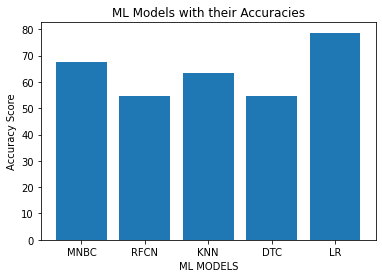

In [ ]:
plt.bar(x=['MNBC','RFCN','KNN','DTC','LR'],height = [nbc_accuracy*100,rfc_accuracy*100,knn_accuracy*100,dtc_accuracy*100,lr_accuracy*100])
plt.title('ML Models with their Accuracies')
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy Score")
plt.show()
# 'SVM'     ,svm_accuracy*100        ,'svm_ypred':svm_ypred

In [ ]:
sentiment_1 = pd.DataFrame({'y_test':y_test,'nbc_ypred':nbc_ypred,'rfc_ypred':rfc_ypred,'knn_ypred':knn_ypred,'dtc_ypred':dtc_ypred,'lr_ypred':lr_ypred})
sentiment_1

,y_test,nbc_ypred,rfc_ypred,knn_ypred,dtc_ypred,lr_ypred
20797,Negative,Negative,Positive,Positive,Negative,Negative
13373,Positive,Positive,Positive,Neutral,Positive,Positive
26989,Negative,Neutral,Positive,Neutral,Neutral,Neutral
10524,Negative,Positive,Positive,Positive,Negative,Negative
32461,Positive,Positive,Positive,Positive,Positive,Positive
...,...,...,...,...,...,...
38111,Positive,Positive,Positive,Positive,Negative,Positive
26799,Positive,Positive,Positive,Positive,Positive,Positive
17420,Neutral,Neutral,Positive,Neutral,Neutral,Neutral
17405,Positive,Positive,Positive,Positive,Positive,Positive


# ## HENCE, OUT OF ( Multinomial Naive Bayes, RandomForest, KNN )--MODELS, MAYBE
# ## MULTINOMIAL NAIVE BAYES MODEL GIVES THE BEST RESULTS.

In [69]:
print('Multinomial Naive Bayes Model - Accuracy : ',nbc_accuracy*100)

Multinomial Naive Bayes Model - Accuracy :  67.38581146744413


# ## BUT OUT OF ( Multinomial Naive Bayes, RandomForest, KNN, Decision Tree,            Logistic Regression )--MODELS, MAYBE
# ## LOGISTIC REGRESSION MODEL GIVES THE BEST RESULTS.

In [70]:
print('Logistic Regression Model - Accuracy : ',lr_accuracy*100)

Logistic Regression Model - Accuracy :  78.68804664723032
